<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Zalocusky_Data_Scanpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import h5py    
import numpy as np    
import scipy 
from matplotlib import pyplot as plt
!pip install scanpy
import scanpy as sc
import tarfile
import os

In [47]:
# '''Download all single samples'''
# link = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_RAW.tar'
# file_name = 'GSE167497_RAW.tar'
# !wget -O $file_name $link
# my_tar = tarfile.open('/content/GSE167497_RAW.tar')
# my_tar.extractall('./my_folder') # specify which folder to extract to
# my_tar.close()
# for f in os.listdir('./my_folder'):
#     print(f)

In [ ]:
def get_file(link):
    file_name = os.path.basename(link)
    !wget -O $file_name $link
    return file_name

barcode_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_barcode_summary_h5.h5')
filtered_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_filtered_gene_bc_matrices_h5.h5')
raw_gene_file_name = get_file('https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_raw_gene_bc_matrices_h5.h5')


In [97]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.22.4 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.2.2 statsmodels==0.13.5 pynndescent==0.5.10


In [127]:
adata = sc.read_10x_h5(raw_gene_file_name)
sc.pp.filter_cells(adata, min_genes=5)
# sc.pp.filter_cells(adata, max_genes=2400)
sc.pp.filter_genes(adata, min_cells=0)
# sc.pp.filter_genes(adata, max_cells=4500)
adata

reading GSE167497_raw_gene_bc_matrices_h5.h5
 (0:00:01)
filtered out 619366 cells that have less than 5 genes expressed


AnnData object with n_obs × n_vars = 117914 × 27998
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [120]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

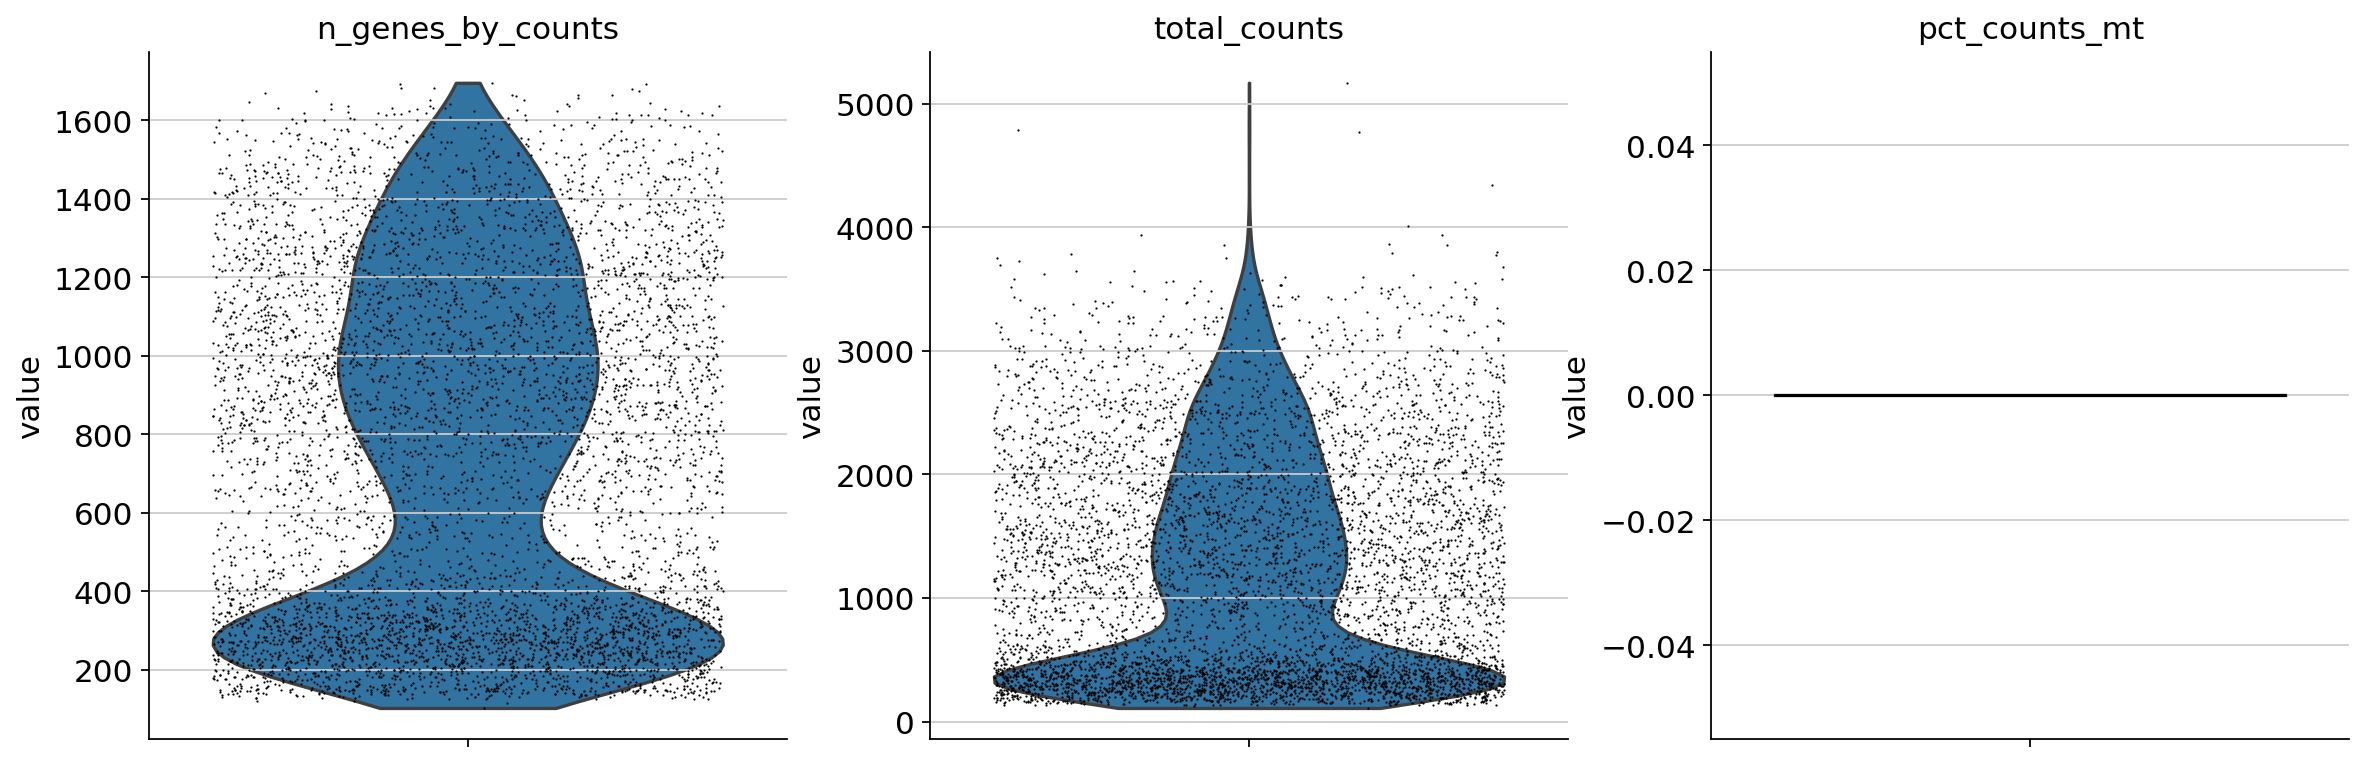

In [122]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

AnnData object with n_obs × n_vars = 6684 × 17934
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [101]:
metrics = sc.pp.calculate_qc_metrics(adata)

In [104]:
display(metrics[0])

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
AAACCTGAGAAACCAT-1,5,1.791759,5.0,1.791759,100.000000,100.000000,100.0,100.0
AAACCTGAGAAACCGC-1,4,1.609438,4.0,1.609438,100.000000,100.000000,100.0,100.0
AAACCTGAGAAACCTA-1,66,4.204693,81.0,4.406719,80.246914,100.000000,100.0,100.0
AAACCTGAGAAACGAG-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
AAACCTGAGAAACGCC-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
TTTGTCATCTTTACAC-1,2,1.098612,5.0,1.791759,100.000000,100.000000,100.0,100.0
TTTGTCATCTTTACGT-1,0,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN
TTTGTCATCTTTAGGG-1,119,4.787492,173.0,5.159055,60.115607,89.017341,100.0,100.0
TTTGTCATCTTTAGTC-1,5,1.791759,5.0,1.791759,100.000000,100.000000,100.0,100.0


In [93]:
zdata.var_names_make_unique()
display(zdata.obs.index )
display(zdata.var.index )
display(zdata.X['AAACCTGAGAAACCAT-1','Xkr4'] )


Index(['AAACCTGAGAAACCAT-1', 'AAACCTGAGAAACCGC-1', 'AAACCTGAGAAACCTA-1',
       'AAACCTGAGAAACGAG-1', 'AAACCTGAGAAACGCC-1', 'AAACCTGAGAAAGTGG-1',
       'AAACCTGAGAACAACT-1', 'AAACCTGAGAACAATC-1', 'AAACCTGAGAACTCGG-1',
       'AAACCTGAGAACTGTA-1',
       ...
       'TTTGTCATCTTGGGTA-1', 'TTTGTCATCTTGTACT-1', 'TTTGTCATCTTGTATC-1',
       'TTTGTCATCTTGTCAT-1', 'TTTGTCATCTTGTTTG-1', 'TTTGTCATCTTTACAC-1',
       'TTTGTCATCTTTACGT-1', 'TTTGTCATCTTTAGGG-1', 'TTTGTCATCTTTAGTC-1',
       'TTTGTCATCTTTCCTC-1'],
      dtype='object', length=737280)

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Rp1-1', 'Sox17', 'Gm37323',
       'Mrpl15', 'Lypla1', 'Gm37988',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'PISD', 'DHRSX', 'Vmn2r122', 'CAAA01147332.1'],
      dtype='object', length=27998)

IndexError: ignored

TypeError: ignored

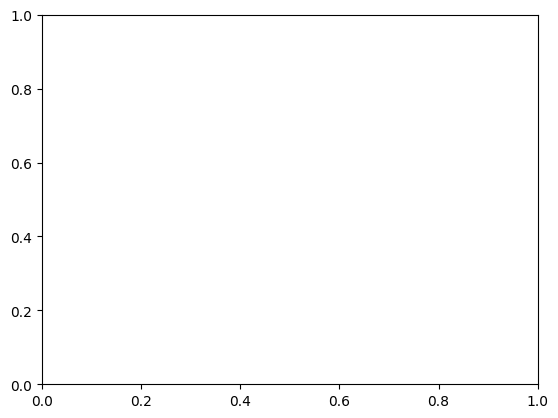

In [31]:
plt.axes().pcolorfast(zdata.X)

In [21]:
link = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE167nnn/GSE167497/suppl/GSE167497_barcode_summary_h5.h5'
file_name = 'GSE167497_barcode_summary_h5.h5'
# !wget -O $file_name $link
f1 = h5py.File("/content/"+file_name,'r+') 
f1.keys()
bc_sequence = f1['bc_sequence']
mx = np.zeros_like(bc_sequence)
for bi in range(len(bc_sequence)) : 
    mx[bi] = bc_sequence[bi][-1:]

KeyboardInterrupt: ignored